In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [12]:
data_consulta2 = pd.read_csv('consulta2.csv')
data_consulta8 = pd.read_csv('consulta8.csv')
data_consulta11 = pd.read_csv('consulta11.csv')
data_consulta18 = pd.read_csv('consulta18.csv')
data_consulta19 = pd.read_csv('consulta19.csv')
data_consulta24 = pd.read_csv('consulta24.csv')
data_consulta26 = pd.read_csv('consulta26.csv')
data_consulta27 = pd.read_csv('consulta27.csv')
data_consulta28 = pd.read_csv('consulta28.csv')
data_consulta29 = pd.read_csv('consulta29.csv')
data_consulta31 = pd.read_csv('consulta31.csv')

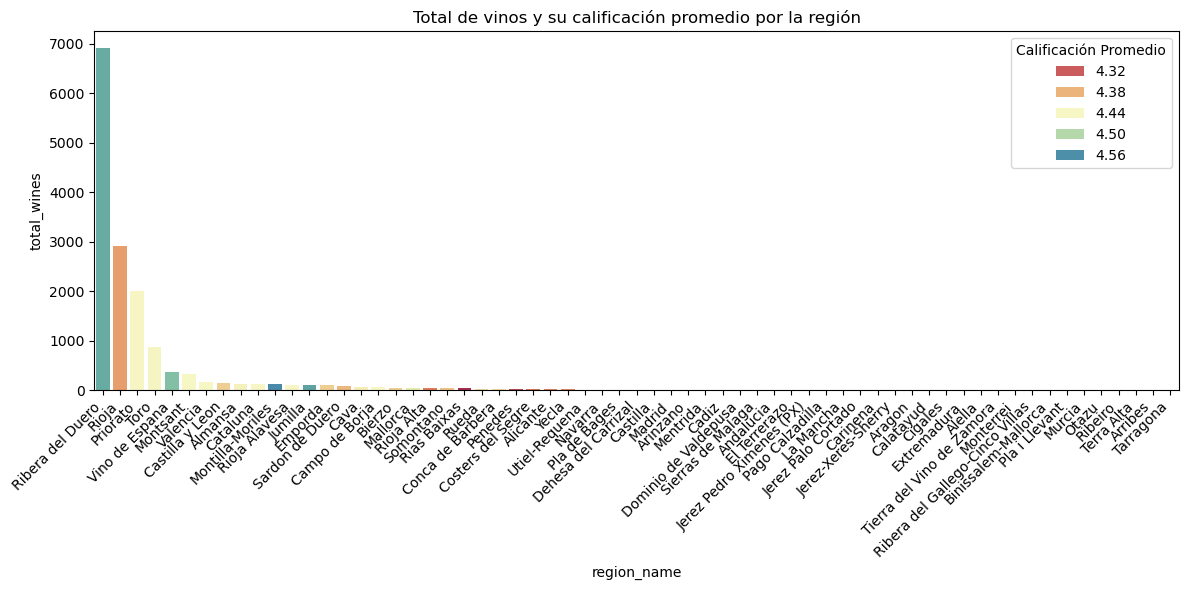

In [13]:
# Consulta 2: Distribución regional de vinos y calificación promedio 
# Se visualizan la cantidad de vino y su calificación dependiendo de la región 

# Se hace una paleta personalizada 
palette = sns.color_palette("Spectral", as_cmap=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=data_consulta2, x='region_name', y='total_wines', hue='avg_rating', palette=palette)
plt.title('Total de vinos y su calificación promedio por la región')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Calificación Promedio')
plt.tight_layout()
plt.show()

C:\Users\Gema\AppData\Local\Temp\ipykernel_20484\1467065340.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




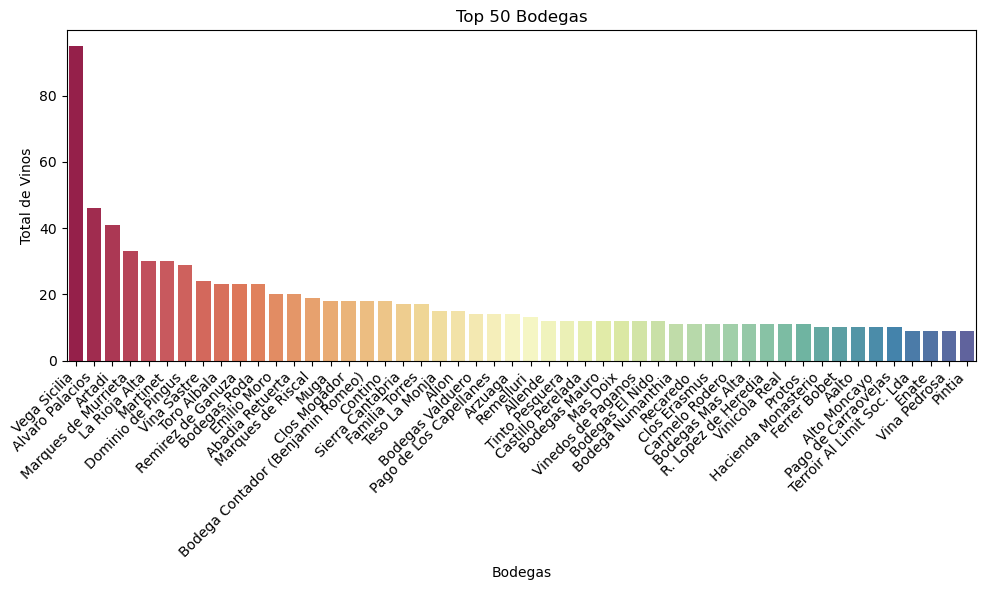

In [14]:
# Consulta 8 - Top 50 bodegas
top_wineries = data_consulta8.sort_values(by='total_wines', ascending=False).head(50)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_wineries, x='winery', y='total_wines', palette='Spectral')
plt.title('Top 50 Bodegas')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Bodegas')
plt.ylabel('Total de Vinos')
plt.tight_layout()
plt.show()

C:\Users\Gema\AppData\Local\Temp\ipykernel_20484\1575105821.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




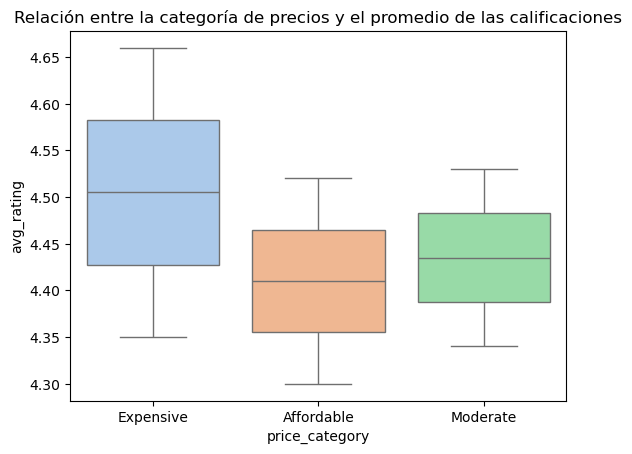

In [15]:
# Consulta 28: Relación entre categoría de precios y calificación promedio
sns.boxplot(data=data_consulta28, x='price_category', y='avg_rating', palette='pastel')
plt.title('Relación entre la categoría de precios y el promedio de las calificaciones')
plt.show()

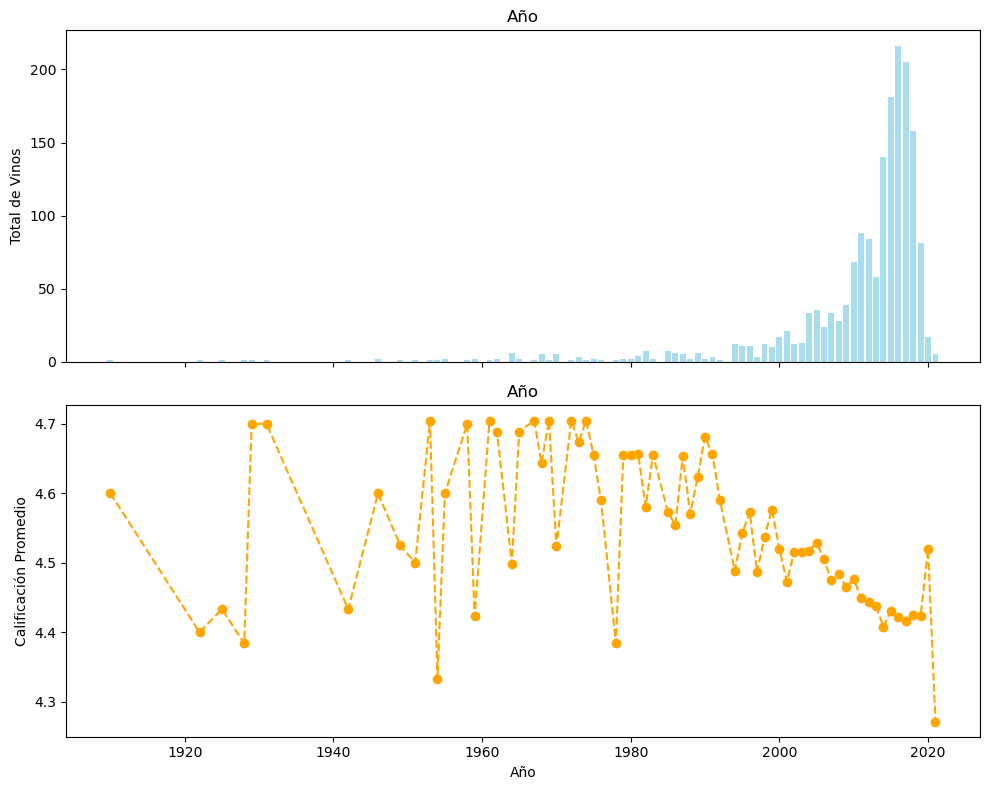

In [16]:
# Consulta 18: Evolución de los vinos y sus calificaciones en el tiempo
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Total de vinos
axs[0].bar(data_consulta18['wine_year'], data_consulta18['total_wines'], color='skyblue', alpha=0.7)
axs[0].set_title('Año')
axs[0].set_ylabel('Total de Vinos')

# Calificación promedio
axs[1].plot(data_consulta26['wine_year'], data_consulta26['avg_rating'], color='orange', marker='o', linestyle='--')
axs[1].set_title('Año')
axs[1].set_ylabel('Calificación Promedio')
axs[1].set_xlabel('Año')

plt.tight_layout()
plt.show()

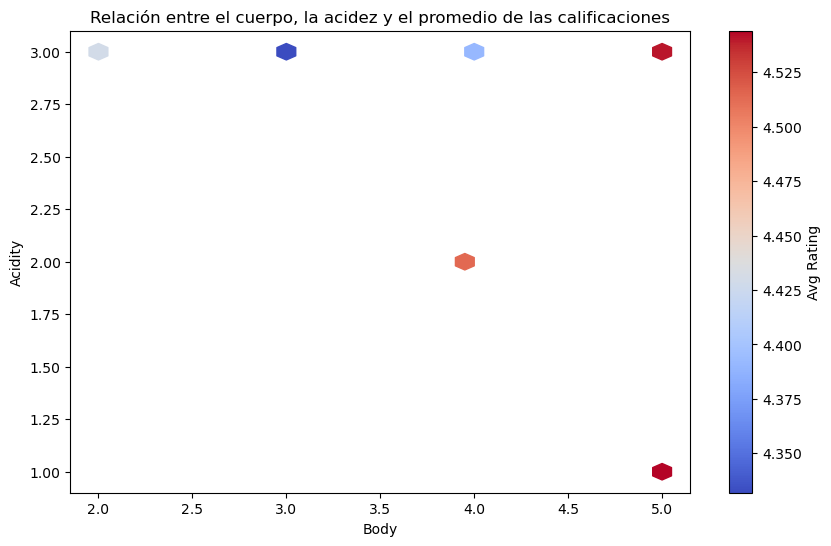

In [17]:
# Consulta 19: Relación entre cuerpo, acidez y calificación promedio
plt.figure(figsize=(10, 6))
plt.hexbin(data_consulta19['body'], data_consulta19['acidity'], 
           C=data_consulta19['avg_rating'], gridsize=30, cmap='coolwarm')
plt.colorbar(label='Avg Rating')
plt.xlabel('Body')
plt.ylabel('Acidity')
plt.title('Relación entre el cuerpo, la acidez y el promedio de las calificaciones')
plt.show()

In [18]:
# Consulta 19: Relación entre cuerpo, acidez y calificación promedio
# Panel interactivo 
fig = px.scatter_3d(data_consulta19, x='body', y='acidity', z='avg_rating', 
                    color='avg_rating', size='avg_rating', 
                    title='Relación entre el cuerpo, la acidez y el promedio de las calificaciones', 
                    color_continuous_scale='Viridis')
fig.update_traces(marker=dict(opacity=0.8))
fig.show()

C:\Users\Gema\AppData\Local\Temp\ipykernel_20484\956982442.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




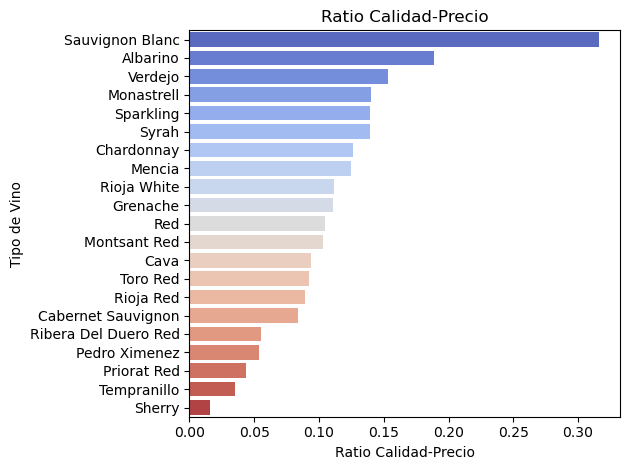

In [19]:
# Consulta 29 Relación entre calificación promedio y total de vinos
data_sorted = data_consulta29.sort_values(by='avg_quality_price_ratio', ascending=False)
sns.barplot(data=data_sorted, x='avg_quality_price_ratio', y='wine_type', palette='coolwarm')
plt.title('Ratio Calidad-Precio')
plt.xlabel('Ratio Calidad-Precio')
plt.ylabel('Tipo de Vino')
plt.tight_layout()
plt.show()

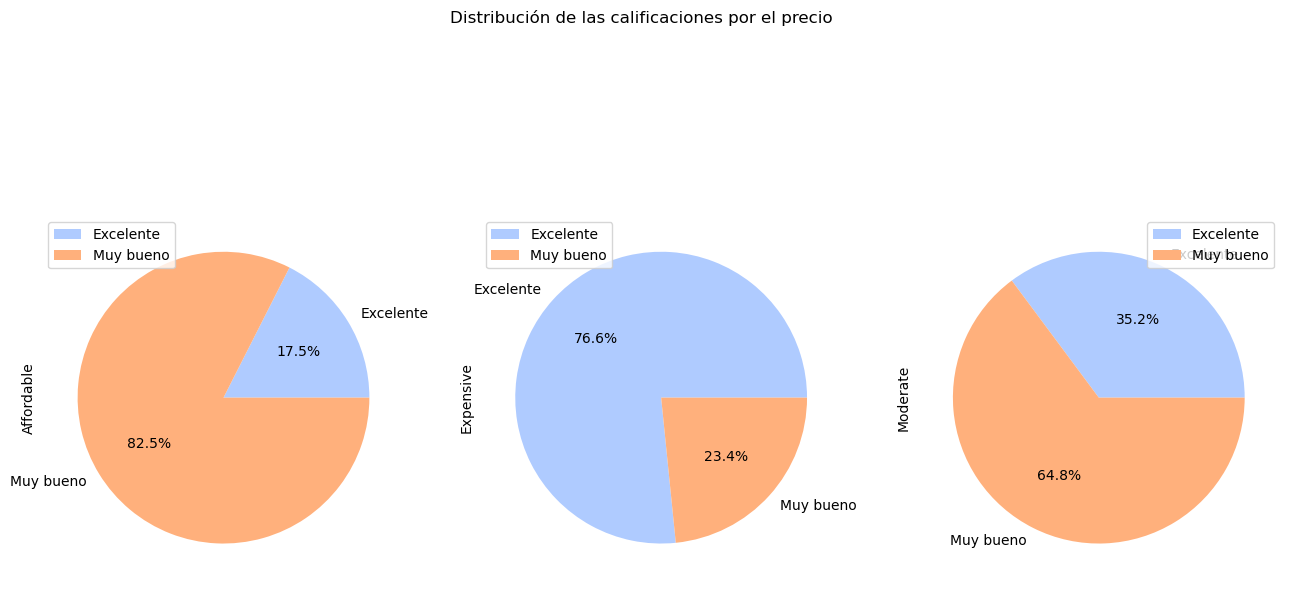

In [20]:
# Consulta 28: Distribución de calificaciones por categoría de precio
custom_colors = ['#AFCBFF', '#FFB07C']
categories = data_consulta28.groupby(['rating_category', 'price_category']).sum()['total_wines'].unstack()
categories.plot(
    kind='pie',
    subplots=True,
    autopct='%1.1f%%',
    figsize=(16, 8),
    colors=custom_colors
)
plt.suptitle('Distribución de las calificaciones por el precio')
plt.show()